# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow import keras
from tensorflow.keras import models
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm

# Loading dataset

In [2]:
#Loading data
(x_train,y_train) , (x_test ,y_test) = keras.datasets.mnist.load_data()

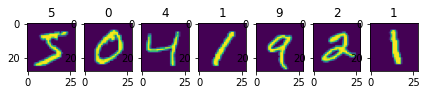

In [3]:
fig, axes=plt.subplots(1,7,figsize=(7,3))
for img,label,ax in zip(x_train[:7],y_train[:7],axes):
  ax.set_title(label)
  ax.imshow(img)
plt.show()

In [4]:
#Shape of the data
print("The X train data shape is: ", x_train.shape)
print("The Y train data shape is: ", y_train.shape)
print("The X test data shape is: ", x_test.shape)
print("The Y test data shape is: ", y_test.shape)

The X train data shape is:  (60000, 28, 28)
The Y train data shape is:  (60000,)
The X test data shape is:  (10000, 28, 28)
The Y test data shape is:  (10000,)


# Applying HOG

In [5]:
#HOG Function
def HOG(X, image_shape=(28, 28), pixels_per_cell=(4, 4)):
    feature_matrix = []
    for row in X:
        img = row.reshape(image_shape)
        fd = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(2, 2))
        feature_matrix.append(fd)
    
    return np.array(feature_matrix)

In [6]:
#Apply HOG on x_train
x_train = HOG(x_train, pixels_per_cell=(4,4))

In [7]:
#Apply HOG on x_test
x_test = HOG(x_test, pixels_per_cell=(4, 4))

# Checking the shape of X_train and X_test

In [8]:
#Shape of the data
print("The X train data shape is: ", x_train.shape)
print("The X test data shape is: ", x_test.shape)

The X train data shape is:  (60000, 1152)
The X test data shape is:  (10000, 1152)


# Applying KNN

In [9]:
KNN = KNeighborsClassifier(7).fit(x_train,y_train)
knn_prediction = KNN.predict(x_test)

In [10]:
KNN_accuracy = metrics.accuracy_score(y_test, knn_prediction)
print("accuracy: ", KNN_accuracy*100 , "%")

accuracy:  97.45 %


# Applying SVM with LinearSVC

In [11]:
#Apply SVM (Support Vector Machine )
#Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term.
svc = svm.LinearSVC(C = 2)

# Train the model using the training sets
svc.fit(x_train, y_train)

# svc = svm.SVC(kernel ='linear', C = 0.1,max_iter=250)
# svc.fit(x_train, y_train)
# # Calculate Accuracy of Model
# predicted= svc.predict(x_test)
# accuracy = accuracy_score(y_test,predicted)
# print("Model Accuracy is", accuracy)

C:\Users\abanoub samir\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=2)

In [12]:
predicted= svc.predict(x_test)

In [13]:
# Calculate Accuracy of Model
accuracy = accuracy_score(y_test,predicted)
print("Model Accuracy is", accuracy*100,"%")

Model Accuracy is 98.21 %


# Applying Random Forest

In [14]:
#n_estimators: The number of decision trees being built in the forest
#Max_depth: The maximum levels allowed in a decision tree. If set to nothing, The decision tree will keep on splitting until purity is reached
rf = RandomForestClassifier(n_estimators=500, max_depth = 22, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=22, n_estimators=500, random_state=42)

In [15]:
y_pred=rf.predict(x_test)

In [16]:
print("Accuracy: ",accuracy_score(y_pred, y_test)*100,"%")

Accuracy:  97.78 %


In [17]:
# Using cross validation to evaluate performance. Compute mean score and 95% interval of score estimate
scores = cross_val_score(rf, x_test, y_test, cv=5, scoring='accuracy')
print(scores)
print("Cross-Validation (CV=5) Accuracy: ", scores.mean()*100,"%")

[0.957  0.951  0.9695 0.9815 0.9785]
Cross-Validation (CV=5) Accuracy:  96.75 %


In [18]:
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

